In [ ]:
import os
import time
import librosa
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import pydub
import pandas as pd
import scipy
import random
from random import shuffle
from scipy.io.wavfile import read as read_wav
from scipy.signal import spectrogram
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import sklearn
import pickle
from pathlib import Path
from collections import Counter
from sklearn.model_selection import cross_validate, GroupKFold, KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import optuna

In [ ]:
current_dir = Path.cwd()
path = current_dir/ 'Audio files 600'
files = []
try:
    with open("audio_files_600elements.txt") as f:
        files = f.readlines()


    # remove new line characters
    files = [x.strip() for x in files]
except FileNotFoundError:
    print("Please check the path")

print(len(files))
print(files)

600
['37_dog_barking.wav', '259_dog_growling.wav', '417_dog_snoring.wav', '317_dog_howling.wav', '498_dog_snoring.wav', '533_dog_whimper.wav', '157_dog_breath.wav', '196_dog_breath.wav', '271_dog_growling.wav', '480_dog_snoring.wav', '22_dog_barking.wav', '313_dog_howling.wav', '368_dog_howling.wav', '554_dog_whimper.wav', '560_dog_whimper.wav', '596_dog_whimper.wav', '301_dog_howling.wav', '588_dog_whimper.wav', '7_dog_barking.wav', '234_dog_growling.wav', '141_dog_breath.wav', '516_dog_whimper.wav', '396_dog_howling.wav', '414_dog_snoring.wav', '509_dog_whimper.wav', '587_dog_whimper.wav', '198_dog_breath.wav', '545_dog_whimper.wav', '105_dog_breath.wav', '86_dog_barking.wav', '154_dog_breath.wav', '134_dog_breath.wav', '505_dog_whimper.wav', '191_dog_breath.wav', '473_dog_snoring.wav', '249_dog_growling.wav', '289_dog_growling.wav', '286_dog_growling.wav', '379_dog_howling.wav', '139_dog_breath.wav', '461_dog_snoring.wav', '251_dog_growling.wav', '228_dog_growling.wav', '450_dog_sno

22050
596_dog_whimper.wav
(129, 492)
22050


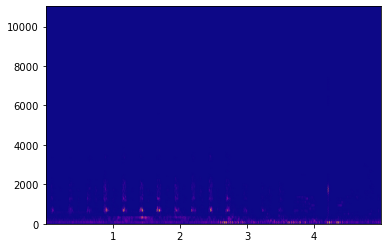

In [ ]:
fs, signal = read_wav(path / files[132])
print(fs)
print(files[15])

f, t, Sxx = spectrogram(signal, fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud', cmap='plasma')

print(np.shape(Sxx))
print(fs)

C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\932675215.py:3: FutureWarning: Pass y=[0.00073755 0.00118351 0.00132763 ... 0.00457859 0.00476158 0.00536084] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_13_coeffs = librosa.feature.mfcc(signal, sr=fs, n_mfcc=13)


(13, 216)


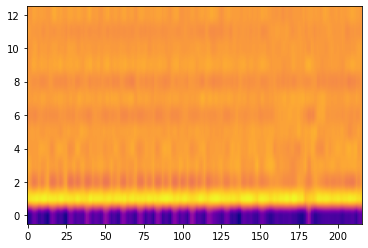

In [ ]:
signal, fs = librosa.load(path / files[132], sr=None) #trzeba zdefiniować częstotliwość próbkowania jako None,

mfcc_13_coeffs = librosa.feature.mfcc(signal, sr=fs, n_mfcc=13)
print(mfcc_13_coeffs.shape)

plt.imshow(mfcc_13_coeffs, cmap='plasma', aspect='auto')
plt.gca().invert_yaxis()

[Text(0.5, 1.0, 'MFCC')]

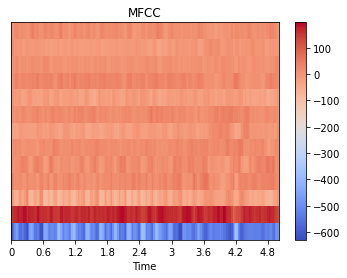

In [ ]:
import librosa.display

fig, ax = plt.subplots()
img = librosa.display.specshow(mfcc_13_coeffs, x_axis='time', ax=ax)
fig.colorbar(img, ax=ax) #obok obrazu będzie wyświetlony pasek ze skalą kolorystyczną
ax.set(title='MFCC')

In [ ]:
#print(files[0])

mfccs = []
sig_len = []
for file in files:
    x, fs = librosa.load(path/file)
    mfcc_13_coeffs = librosa.feature.mfcc(x, sr=fs, n_mfcc=13)
    mfccs.append(mfcc_13_coeffs)
    sig_len.append(np.shape(mfcc_13_coeffs)[1])
trunc_mfccs = []
for item in mfccs:
    item = item[:, :np.min(sig_len)]
    trunc_mfccs.append(item)
mfccs = np.asarray(trunc_mfccs)
np.shape(mfccs)

C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\3564600185.py:7: FutureWarning: Pass y=[0.00896907 0.00927699 0.00863063 ... 0.17635942 0.2110529  0.25081074] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_13_coeffs = librosa.feature.mfcc(x, sr=fs, n_mfcc=13)
C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\3564600185.py:7: FutureWarning: Pass y=[ 0.13373399  0.18527055  0.1214354  ... -0.00070155  0.00083303
  0.00515521] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_13_coeffs = librosa.feature.mfcc(x, sr=fs, n_mfcc=13)
C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\3564600185.py:7: FutureWarning: Pass y=[ 0.0035913   0.00442576  0.00214148 ...  0.0006938  -0.00380433
 -0.00211167] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_13_coeffs = librosa.feature.mfcc(x, sr=fs, n_mfcc=13)
C:\Users\jakub\AppData\Local\Tem

C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\3564600185.py:7: FutureWarning: Pass y=[-0.00042534 -0.00057375  0.00055659 ... -0.00476313  0.00500977
  0.00115335] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_13_coeffs = librosa.feature.mfcc(x, sr=fs, n_mfcc=13)
C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\3564600185.py:7: FutureWarning: Pass y=[ 0.00235999  0.00518262  0.00899339 ...  0.00302911  0.00078714
 -0.0104214 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_13_coeffs = librosa.feature.mfcc(x, sr=fs, n_mfcc=13)
C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\3564600185.py:7: FutureWarning: Pass y=[-0.0100807  -0.01582873 -0.01433718 ... -0.03347278 -0.03859258
 -0.04682791] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_13_coeffs = librosa.feature.mfcc(x, sr=fs, n_mfcc=13)
C:\Users\jakub\AppData\Lo

C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\3564600185.py:7: FutureWarning: Pass y=[0.0003401  0.00081944 0.00064647 ... 0.00058103 0.00089002 0.00023746] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_13_coeffs = librosa.feature.mfcc(x, sr=fs, n_mfcc=13)
C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\3564600185.py:7: FutureWarning: Pass y=[-0.01840293 -0.02194059 -0.01191628 ... -0.08669662 -0.07837141
 -0.07406914] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_13_coeffs = librosa.feature.mfcc(x, sr=fs, n_mfcc=13)
C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\3564600185.py:7: FutureWarning: Pass y=[-0.10839653 -0.13644743 -0.07993519 ...  0.2878424   0.2113291
  0.25436985] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_13_coeffs = librosa.feature.mfcc(x, sr=fs, n_mfcc=13)
C:\Users\jakub\AppData\Local\Temp

C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\3564600185.py:7: FutureWarning: Pass y=[-0.0048672  -0.00099695  0.00156891 ... -0.1829797  -0.2503128
 -0.29586768] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_13_coeffs = librosa.feature.mfcc(x, sr=fs, n_mfcc=13)
C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\3564600185.py:7: FutureWarning: Pass y=[ 0.00172567  0.00342047  0.00236332 ... -0.00327897 -0.00110042
 -0.00335622] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_13_coeffs = librosa.feature.mfcc(x, sr=fs, n_mfcc=13)
C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\3564600185.py:7: FutureWarning: Pass y=[-0.00545156 -0.00903773 -0.00722039 ... -0.00639367 -0.0004226
  0.00622416] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_13_coeffs = librosa.feature.mfcc(x, sr=fs, n_mfcc=13)
C:\Users\jakub\AppData\Loca

C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\3564600185.py:7: FutureWarning: Pass y=[-0.0017817  -0.00200934 -0.0017002  ...  0.00245203  0.00166973
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_13_coeffs = librosa.feature.mfcc(x, sr=fs, n_mfcc=13)
C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\3564600185.py:7: FutureWarning: Pass y=[ 0.08074903  0.12940717  0.12448967 ...  0.03034496 -0.03893852
  0.04081535] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_13_coeffs = librosa.feature.mfcc(x, sr=fs, n_mfcc=13)
C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\3564600185.py:7: FutureWarning: Pass y=[0.00073755 0.00118351 0.00132763 ... 0.00457859 0.00476158 0.00536084] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_13_coeffs = librosa.feature.mfcc(x, sr=fs, n_mfcc=13)
C:\Users\jakub\AppData\Local\Tem

C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\3564600185.py:7: FutureWarning: Pass y=[-0.05785465 -0.08611345 -0.08013189 ...  0.01935995  0.0119276
 -0.03404474] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_13_coeffs = librosa.feature.mfcc(x, sr=fs, n_mfcc=13)
C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\3564600185.py:7: FutureWarning: Pass y=[-0.00759125 -0.01338649 -0.01041412 ...  0.00277197  0.01245618
  0.02551174] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_13_coeffs = librosa.feature.mfcc(x, sr=fs, n_mfcc=13)
C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\3564600185.py:7: FutureWarning: Pass y=[0.04706931 0.13251889 0.14282644 ... 0.07454002 0.07971847 0.06026709] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_13_coeffs = librosa.feature.mfcc(x, sr=fs, n_mfcc=13)
C:\Users\jakub\AppData\Local\Temp

C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\3564600185.py:7: FutureWarning: Pass y=[-2.5563611e-05 -8.6800519e-06 -7.6532651e-06 ...  5.2997272e-04
  6.8732013e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_13_coeffs = librosa.feature.mfcc(x, sr=fs, n_mfcc=13)
C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\3564600185.py:7: FutureWarning: Pass y=[ 0.00393403 -0.00521791 -0.02016163 ... -0.3687513  -0.15925515
  0.03383255] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_13_coeffs = librosa.feature.mfcc(x, sr=fs, n_mfcc=13)
C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\3564600185.py:7: FutureWarning: Pass y=[ 0.0038228   0.00617719  0.0063026  ...  0.0066371  -0.00180447
 -0.00661409] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_13_coeffs = librosa.feature.mfcc(x, sr=fs, n_mfcc=13)
C:\User

C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\3564600185.py:7: FutureWarning: Pass y=[ 0.01092446  0.0014751  -0.00267088 ... -0.00386465  0.00487685
  0.00844681] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_13_coeffs = librosa.feature.mfcc(x, sr=fs, n_mfcc=13)
C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\3564600185.py:7: FutureWarning: Pass y=[ 0.04578257  0.06764126  0.05996215 ... -0.00228012  0.00030375
  0.00123286] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_13_coeffs = librosa.feature.mfcc(x, sr=fs, n_mfcc=13)
C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\3564600185.py:7: FutureWarning: Pass y=[ 0.00868905  0.00063252 -0.01393306 ...  0.01107132  0.01059186
  0.01141512] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_13_coeffs = librosa.feature.mfcc(x, sr=fs, n_mfcc=13)
C:\Users\jakub\AppData\Lo

C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\3564600185.py:7: FutureWarning: Pass y=[-0.01447606 -0.01142597  0.00849438 ...  0.00794089 -0.06821024
 -0.0478934 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_13_coeffs = librosa.feature.mfcc(x, sr=fs, n_mfcc=13)
C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\3564600185.py:7: FutureWarning: Pass y=[-0.2591504  -0.3739792  -0.29694486 ... -0.03486347  0.05320549
  0.15111578] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_13_coeffs = librosa.feature.mfcc(x, sr=fs, n_mfcc=13)
C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\3564600185.py:7: FutureWarning: Pass y=[ 0.00394499  0.00686049  0.00720668 ... -0.00206077  0.0005883
  0.00301278] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_13_coeffs = librosa.feature.mfcc(x, sr=fs, n_mfcc=13)
C:\Users\jakub\AppData\Loc

C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\3564600185.py:7: FutureWarning: Pass y=[-0.00144923 -0.00326359 -0.00197327 ... -0.00049329 -0.001948
 -0.0040493 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_13_coeffs = librosa.feature.mfcc(x, sr=fs, n_mfcc=13)
C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\3564600185.py:7: FutureWarning: Pass y=[-0.00656879 -0.01156437 -0.02046478 ...  0.00603878  0.007424
  0.00908947] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_13_coeffs = librosa.feature.mfcc(x, sr=fs, n_mfcc=13)
C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\3564600185.py:7: FutureWarning: Pass y=[-0.06958342 -0.12679148 -0.12355638 ...  0.07696927  0.06654847
  0.05758178] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_13_coeffs = librosa.feature.mfcc(x, sr=fs, n_mfcc=13)
C:\Users\jakub\AppData\Local\

C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\3564600185.py:7: FutureWarning: Pass y=[0.00924385 0.01165438 0.01288104 ... 0.00378752 0.00572693 0.00583947] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_13_coeffs = librosa.feature.mfcc(x, sr=fs, n_mfcc=13)
C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\3564600185.py:7: FutureWarning: Pass y=[-0.01347208 -0.02344275 -0.02510035 ...  0.00168383  0.00143039
  0.00094271] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_13_coeffs = librosa.feature.mfcc(x, sr=fs, n_mfcc=13)
C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\3564600185.py:7: FutureWarning: Pass y=[-0.00054622 -0.00329518 -0.00221515 ...  0.00399387  0.00279415
  0.00375175] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_13_coeffs = librosa.feature.mfcc(x, sr=fs, n_mfcc=13)
C:\Users\jakub\AppData\Local\Tem

C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\3564600185.py:7: FutureWarning: Pass y=[ 0.04851341  0.02895677 -0.05037713 ...  0.07148242  0.06225121
  0.07797503] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_13_coeffs = librosa.feature.mfcc(x, sr=fs, n_mfcc=13)
C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\3564600185.py:7: FutureWarning: Pass y=[ 0.03215027  0.0377686   0.01818037 ... -0.00587451 -0.00654936
 -0.00751007] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_13_coeffs = librosa.feature.mfcc(x, sr=fs, n_mfcc=13)
C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\3564600185.py:7: FutureWarning: Pass y=[ 0.00565565  0.0025686  -0.00910079 ... -0.23234057  0.11538064
  0.17788494] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_13_coeffs = librosa.feature.mfcc(x, sr=fs, n_mfcc=13)
C:\Users\jakub\AppData\Lo

C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\3564600185.py:7: FutureWarning: Pass y=[-0.12356746 -0.21010506 -0.212569   ... -0.2823707  -0.30354738
 -0.35248983] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_13_coeffs = librosa.feature.mfcc(x, sr=fs, n_mfcc=13)
C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\3564600185.py:7: FutureWarning: Pass y=[ 0.02524054  0.02930486  0.01758504 ... -0.01473892 -0.00757134
 -0.00143051] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_13_coeffs = librosa.feature.mfcc(x, sr=fs, n_mfcc=13)
C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\3564600185.py:7: FutureWarning: Pass y=[-0.00830364 -0.01170599 -0.00881064 ... -0.00472915 -0.00026643
  0.00773704] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_13_coeffs = librosa.feature.mfcc(x, sr=fs, n_mfcc=13)
C:\Users\jakub\AppData\Lo

C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\3564600185.py:7: FutureWarning: Pass y=[-0.00064354 -0.00091749 -0.00093825 ... -0.00989938 -0.00989098
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_13_coeffs = librosa.feature.mfcc(x, sr=fs, n_mfcc=13)
C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\3564600185.py:7: FutureWarning: Pass y=[ 0.0025378   0.00170123 -0.00051044 ... -0.01468646 -0.0168452
 -0.01061077] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_13_coeffs = librosa.feature.mfcc(x, sr=fs, n_mfcc=13)
C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\3564600185.py:7: FutureWarning: Pass y=[0.05351174 0.08112907 0.06051743 ... 0.09366024 0.05914319 0.04008758] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_13_coeffs = librosa.feature.mfcc(x, sr=fs, n_mfcc=13)
C:\Users\jakub\AppData\Local\Temp

C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\3564600185.py:7: FutureWarning: Pass y=[0.2600217  0.3611207  0.28761733 ... 0.24577641 0.28443682 0.35541987] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_13_coeffs = librosa.feature.mfcc(x, sr=fs, n_mfcc=13)
C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\3564600185.py:7: FutureWarning: Pass y=[-0.02430022 -0.06492841 -0.0508157  ...  0.00076818  0.00063598
  0.00067914] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_13_coeffs = librosa.feature.mfcc(x, sr=fs, n_mfcc=13)
C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\3564600185.py:7: FutureWarning: Pass y=[-1.3722181e-03 -1.9518137e-03 -1.2099743e-03 ... -6.6757202e-06
 -2.6702881e-05  3.3855438e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_13_coeffs = librosa.feature.mfcc(x, sr=fs, n_mfcc=13)
C:\Users\jakub

C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\3564600185.py:7: FutureWarning: Pass y=[-1.8477440e-04 -8.8453293e-05  3.3795834e-04 ... -1.9420385e-03
 -2.2321939e-03 -2.4170876e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_13_coeffs = librosa.feature.mfcc(x, sr=fs, n_mfcc=13)
C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\3564600185.py:7: FutureWarning: Pass y=[-0.0824362   0.03805363  0.29332173 ... -0.03845203  0.02977943
  0.08962059] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_13_coeffs = librosa.feature.mfcc(x, sr=fs, n_mfcc=13)
C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\3564600185.py:7: FutureWarning: Pass y=[ 0.0237751   0.02843606  0.020365   ...  0.00097513 -0.00139451
  0.00026381] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_13_coeffs = librosa.feature.mfcc(x, sr=fs, n_mfcc=13)
C:\User

C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\3564600185.py:7: FutureWarning: Pass y=[ 0.00037658 -0.00114584 -0.00129223 ... -0.00248218 -0.00118387
 -0.0037483 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_13_coeffs = librosa.feature.mfcc(x, sr=fs, n_mfcc=13)
C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\3564600185.py:7: FutureWarning: Pass y=[-0.00174451 -0.00157166 -0.00070775 ... -0.06111693 -0.06311285
 -0.05901921] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_13_coeffs = librosa.feature.mfcc(x, sr=fs, n_mfcc=13)
C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\3564600185.py:7: FutureWarning: Pass y=[ 0.04965186  0.05985427  0.03237915 ... -0.01832438  0.01117063
  0.04663217] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_13_coeffs = librosa.feature.mfcc(x, sr=fs, n_mfcc=13)
C:\Users\jakub\AppData\Lo

C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\3564600185.py:7: FutureWarning: Pass y=[-0.00089335  0.00020158  0.00078964 ... -0.00922632 -0.01583576
 -0.01846981] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_13_coeffs = librosa.feature.mfcc(x, sr=fs, n_mfcc=13)
C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\3564600185.py:7: FutureWarning: Pass y=[-0.00052202 -0.00069523 -0.00091827 ...  0.00026572  0.00047171
  0.00040388] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_13_coeffs = librosa.feature.mfcc(x, sr=fs, n_mfcc=13)
C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\3564600185.py:7: FutureWarning: Pass y=[-0.0030843  -0.00228286 -0.00059676 ... -0.0069989  -0.00475466
 -0.0020088 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_13_coeffs = librosa.feature.mfcc(x, sr=fs, n_mfcc=13)
C:\Users\jakub\AppData\Lo

C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\3564600185.py:7: FutureWarning: Pass y=[-0.22231424 -0.35767603 -0.25640786 ... -0.02761638 -0.02250588
 -0.01574588] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_13_coeffs = librosa.feature.mfcc(x, sr=fs, n_mfcc=13)
C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\3564600185.py:7: FutureWarning: Pass y=[ 0.01660359  0.03534281  0.04144847 ... -0.11128342 -0.04003191
 -0.00574148] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_13_coeffs = librosa.feature.mfcc(x, sr=fs, n_mfcc=13)
C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\3564600185.py:7: FutureWarning: Pass y=[-0.05720139 -0.08728337 -0.07765806 ... -0.06654871 -0.07636869
 -0.09860551] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_13_coeffs = librosa.feature.mfcc(x, sr=fs, n_mfcc=13)
C:\Users\jakub\AppData\Lo

C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\3564600185.py:7: FutureWarning: Pass y=[-1.89594596e-06 -5.49931683e-05 -2.92432029e-04 ... -1.53714875e-02
 -1.41386222e-02  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_13_coeffs = librosa.feature.mfcc(x, sr=fs, n_mfcc=13)
C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\3564600185.py:7: FutureWarning: Pass y=[ 7.0473433e-02  8.7442398e-02  4.9241900e-02 ...  1.9983053e-03
  8.3446503e-05 -1.8978119e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_13_coeffs = librosa.feature.mfcc(x, sr=fs, n_mfcc=13)
C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\3564600185.py:7: FutureWarning: Pass y=[-0.001122   -0.00158012 -0.00161064 ...  0.00031257  0.00074673
  0.00094378] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_13_coeffs = librosa.feature.mfcc(x, s

(600, 13, 168)

[0. 2. 4. 3. 4. 5. 1. 1. 2. 4. 0. 3. 3. 5. 5. 5. 3. 5. 0. 2. 1. 5. 3. 4.
 5. 5. 1. 5. 1. 0. 1. 1. 5. 1. 4. 2. 2. 2. 3. 1. 4. 2. 2. 4. 3. 4. 5. 3.
 1. 3. 5. 0. 5. 3. 2. 3. 1. 2. 3. 4. 0. 5. 0. 3. 5. 0. 1. 1. 0. 5. 4. 3.
 2. 3. 4. 3. 4. 0. 2. 1. 5. 1. 4. 2. 3. 1. 4. 2. 4. 4. 0. 3. 1. 0. 2. 2.
 5. 4. 1. 0. 0. 0. 2. 5. 1. 4. 2. 5. 4. 3. 1. 2. 3. 1. 1. 0. 5. 4. 1. 2.
 1. 4. 4. 0. 4. 2. 3. 3. 5. 1. 0. 3. 1. 1. 5. 1. 0. 3. 3. 1. 3. 4. 3. 2.
 1. 0. 4. 3. 5. 3. 5. 4. 0. 4. 5. 0. 1. 5. 0. 5. 4. 0. 1. 2. 3. 5. 1. 3.
 5. 3. 5. 2. 5. 4. 5. 2. 2. 3. 3. 1. 3. 2. 1. 3. 3. 1. 5. 1. 3. 2. 0. 3.
 0. 0. 4. 3. 0. 3. 0. 5. 1. 1. 0. 4. 4. 5. 0. 1. 0. 0. 5. 2. 5. 2. 0. 0.
 1. 4. 4. 2. 1. 4. 5. 0. 5. 1. 0. 3. 2. 0. 4. 4. 2. 0. 5. 5. 1. 5. 1. 1.
 5. 2. 0. 2. 1. 2. 3. 4. 1. 5. 1. 3. 4. 5. 2. 5. 2. 0. 3. 0. 5. 5. 1. 2.
 4. 0. 2. 1. 2. 5. 4. 3. 0. 5. 3. 4. 3. 1. 3. 0. 2. 2. 5. 4. 2. 1. 2. 5.
 2. 0. 5. 0. 4. 0. 3. 0. 5. 1. 0. 2. 2. 5. 0. 4. 4. 4. 5. 2. 5. 4. 2. 3.
 3. 2. 1. 0. 3. 5. 3. 5. 3. 3. 0. 4. 0. 5. 0. 0. 1.

<BarContainer object of 6 artists>

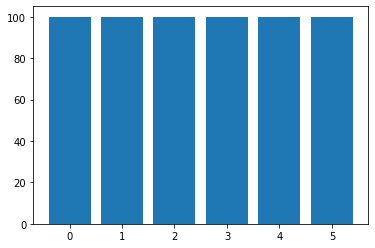

In [ ]:
labels = np.zeros(len(files))

for count, value in enumerate(files):
    if 'breath' in value:
        labels[count] = 1
    if 'growling' in value:
        labels[count] = 2
    if 'howling' in value:
        labels[count] = 3
    if 'snoring' in value:
        labels[count] = 4
    if 'whimper' in value:
        labels[count] = 5



print(labels)
print(labels.shape)
counter_mine = Counter(labels)
plt.bar(counter_mine.keys(), counter_mine.values())

#n_splits=len(np.unique(labels))

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.
  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.
  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.
  4.  4.  4.  4.  4.  4.  5.  5.  5.  5.  5.  5.  5

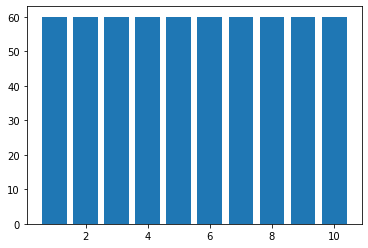

In [ ]:
folds =np.zeros(600)
i=1
num =0
while(i<11):
    numbers = range(num,num+60)
    folds[numbers] = i
    num = num +60
    i= i+1

print(folds)

my_counter = Counter(folds)
plt.bar(my_counter.keys(), my_counter.values())
n_splits=len(np.unique(labels))

#print(n_splits)

[0. 2. 4. 3. 4. 5. 1. 1. 2. 4. 0. 3. 3. 5. 5. 5. 3. 5. 0. 2. 1. 5. 3. 4.
 5. 5. 1. 5. 1. 0. 1. 1. 5. 1. 4. 2. 2. 2. 3. 1. 4. 2. 2. 4. 3. 4. 5. 3.
 1. 3. 5. 0. 5. 3. 2. 3. 1. 2. 3. 4. 0. 5. 0. 3. 5. 0. 1. 1. 0. 5. 4. 3.
 2. 3. 4. 3. 4. 0. 2. 1. 5. 1. 4. 2. 3. 1. 4. 2. 4. 4. 0. 3. 1. 0. 2. 2.
 5. 4. 1. 0. 0. 0. 2. 5. 1. 4. 2. 5. 4. 3. 1. 2. 3. 1. 1. 0. 5. 4. 1. 2.
 1. 4. 4. 0. 4. 2. 3. 3. 5. 1. 0. 3. 1. 1. 5. 1. 0. 3. 3. 1. 3. 4. 3. 2.
 1. 0. 4. 3. 5. 3. 5. 4. 0. 4. 5. 0. 1. 5. 0. 5. 4. 0. 1. 2. 3. 5. 1. 3.
 5. 3. 5. 2. 5. 4. 5. 2. 2. 3. 3. 1. 3. 2. 1. 3. 3. 1. 5. 1. 3. 2. 0. 3.
 0. 0. 4. 3. 0. 3. 0. 5. 1. 1. 0. 4. 4. 5. 0. 1. 0. 0. 5. 2. 5. 2. 0. 0.
 1. 4. 4. 2. 1. 4. 5. 0. 5. 1. 0. 3. 2. 0. 4. 4. 2. 0. 5. 5. 1. 5. 1. 1.
 5. 2. 0. 2. 1. 2. 3. 4. 1. 5. 1. 3. 4. 5. 2. 5. 2. 0. 3. 0. 5. 5. 1. 2.
 4. 0. 2. 1. 2. 5. 4. 3. 0. 5. 3. 4. 3. 1. 3. 0. 2. 2. 5. 4. 2. 1. 2. 5.
 2. 0. 5. 0. 4. 0. 3. 0. 5. 1. 0. 2. 2. 5. 0. 4. 4. 4. 5. 2. 5. 4. 2. 3.
 3. 2. 1. 0. 3. 5. 3. 5. 3. 3. 0. 4. 0. 5. 0. 0. 1.

<BarContainer object of 6 artists>

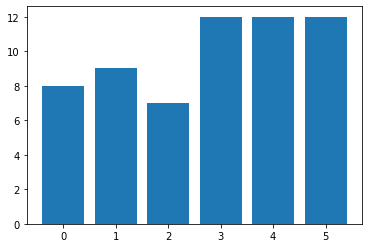

In [ ]:
#print(folds)

train_folds_mask = folds != 10
test_fold_mask = folds == 10
#print(train_folds_mask)
#print(test_fold_mask)

train_folds = folds[train_folds_mask]
test_fold = folds[test_fold_mask]


X_train = mfccs[train_folds_mask]
X_test = mfccs[test_fold_mask]

y_train = labels[train_folds_mask]
y_test = labels[test_fold_mask]

newX_train = X_train.reshape(np.shape(X_train)[0],-1) #-1 oznacza, że wszystko poza pierwszym wymiarem zostanie
                                                    #spłaszczone do jednego wymiaru
newX_test = X_test.reshape(np.shape(X_test)[0],-1)


print(y_train)
print(y_test)

counter_mine = Counter(y_test)
plt.bar(counter_mine.keys(), counter_mine.values())

#n_splits=len(np.unique(labels))

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(newX_train)
X_test = scaler.transform(newX_test)

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, make_scorer
scoring = {'f1_macro': make_scorer(f1_score, average ='macro')}
scoring_acc = {'accuracy': make_scorer(accuracy_score)}
model = SVC(C=1.0, random_state=42)
scores = cross_validate(model, X_train, y_train, scoring=scoring, groups=train_folds, cv=GroupKFold(n_splits=len(np.unique(train_folds))))

scores

{'fit_time': array([0.20012069, 0.19478202, 0.1897316 , 0.1811583 , 0.18104506,
        0.18590736, 0.3130734 , 0.2102437 , 0.20151281]),
 'score_time': array([0.05482626, 0.07431436, 0.04800129, 0.04809618, 0.04579091,
        0.07840466, 0.05062413, 0.04942942, 0.04887533]),
 'test_f1_macro': array([0.56397995, 0.62075594, 0.59819364, 0.5762053 , 0.67638385,
        0.59214001, 0.53214286, 0.60391608, 0.55233918])}

In [ ]:
model.fit(X_train, y_train)
model_test_preds = model.predict(X_test)

print('test accuracy = ', accuracy_score(y_test, model_test_preds))
print('test F1 = ', f1_score(y_test, model_test_preds, average='macro'))
print(confusion_matrix(y_test, model_test_preds))

test accuracy =  0.7166666666666667
test F1 =  0.7138423710792132
[[5 0 2 0 1 0]
 [0 7 0 0 0 2]
 [0 0 7 0 0 0]
 [2 0 1 8 0 1]
 [1 2 0 0 9 0]
 [0 1 4 0 0 7]]


In [ ]:
model = SVC

def get_space(trial):
    space = {'C': trial.suggest_uniform('C', 0, 2),
            'max_iter': trial.suggest_int('max_iter', 100, 1000),
            'kernel': trial.suggest_categorical('kernel',['linear', 'poly','rbf', 'sigmoid']),
            'degree': trial.suggest_int('degree', 1,6)}
    return space
trials = 200 #liczba prób

def objective(trial, model, X_train, y_train):
    model_space = get_space(trial)

    mdl = model(**model_space)
    scores = cross_validate(mdl, X_train, y_train, groups=train_folds, scoring=scoring_acc, cv=GroupKFold(n_splits=len(np.unique(train_folds))), return_train_score=True)

    return np.mean(scores['test_accuracy'])

In [ ]:
study = optuna.create_study(direction='maximize')

[I 2022-12-22 23:15:22,180] A new study created in memory with name: no-name-c24742fb-9127-4c19-85d5-77226d8b90ce


In [ ]:
%%time

study.optimize(lambda x: objective(x, model, X_train, y_train), n_trials=trials)

C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\1127297375.py:4: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  space = {'C': trial.suggest_uniform('C', 0, 2),
[I 2022-12-22 23:15:26,052] Trial 0 finished with value: 0.44444444444444453 and parameters: {'C': 0.38153549647252816, 'max_iter': 655, 'kernel': 'sigmoid', 'degree': 6}. Best is trial 0 with value: 0.44444444444444453.
C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\1127297375.py:4: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  space = {'C': trial.suggest_uniform('C', 0, 2),
[I 2022-12-22 23:15:31,973] Trial 1 finished with value: 0.6222222222222222 and parameters: {'C': 1.2602378188106915,

C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\1127297375.py:4: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  space = {'C': trial.suggest_uniform('C', 0, 2),
C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=723).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=723).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=723).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\jakub\

C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=239).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
[I 2022-12-22 23:16:36,822] Trial 15 finished with value: 0.6407407407407407 and parameters: {'C': 1.939391047966828, 'max_iter': 239, 'kernel': 'rbf', 'degree': 6}. Best is trial 14 with value: 0.6407407407407407.
C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\1127297375.py:4: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  space = {'C': trial.suggest_uniform('C', 0, 2),
[I 2022-12-22 23:16:43,469] Trial 16 finished with value: 0.6388888888888888 and parameters: {'C': 1.966807627231144, 'max_iter': 331, 'kernel': 'rbf', 'degree': 6}. Best is trial 14 with value: 0.6407407407407407.
C:\Users\jakub\AppDat

C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=241).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=241).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=241).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
[I 2022-12-22 23:17:23,054] Trial 23 finished with value: 0.6407407407407407 and parameters: {'C': 1.8228038079137656, 'max_iter': 241, 'kernel': 'rbf', 'degree': 5}. Best is trial 14 with value: 0.6407407407407407.
C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\1127297375.py:4: FutureWarning: suggest_uniform has been deprecated in v3.0.0. Th

C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=286).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=286).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=286).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=286).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=286).

C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=161).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=161).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=161).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=161).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
[I 2022-12-22 23:18:26,918] Trial 35 finished with value: 0.6351851851851851 and parameters: {'C': 1.5094257221591159, 'max_iter

C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=224).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
[I 2022-12-22 23:18:59,770] Trial 41 finished with value: 0.6370370370370371 and parameters: {'C': 1.7571026717639167, 'max_iter': 224, 'kernel': 'rbf', 'degree': 6}. Best is trial 14 with value: 0.6407407407407407.
C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\1127297375.py:4: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  space = {'C': trial.suggest_uniform('C', 0, 2),
[I 2022-12-22 23:19:06,814] Trial 42 finished with value: 0.6407407407407407 and parameters: {'C': 1.8210345781430681, 'max_iter': 563, 'kernel': 'rbf', 'degree': 5}. Best is trial 14 with value: 0.6407407407407407.
C:\Users\jakub\AppD

C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\1127297375.py:4: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  space = {'C': trial.suggest_uniform('C', 0, 2),
[I 2022-12-22 23:20:04,247] Trial 52 finished with value: 0.6370370370370371 and parameters: {'C': 1.6829616526829962, 'max_iter': 751, 'kernel': 'rbf', 'degree': 4}. Best is trial 14 with value: 0.6407407407407407.
C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\1127297375.py:4: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  space = {'C': trial.suggest_uniform('C', 0, 2),
[I 2022-12-22 23:20:10,212] Trial 53 finished with value: 0.6388888888888888 and parameters: {'C': 1.9292579832067116, 'ma

C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\1127297375.py:4: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  space = {'C': trial.suggest_uniform('C', 0, 2),
[I 2022-12-22 23:20:44,026] Trial 60 finished with value: 0.437037037037037 and parameters: {'C': 0.37116273846727355, 'max_iter': 568, 'kernel': 'sigmoid', 'degree': 5}. Best is trial 14 with value: 0.6407407407407407.
C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\1127297375.py:4: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  space = {'C': trial.suggest_uniform('C', 0, 2),
[I 2022-12-22 23:20:49,459] Trial 61 finished with value: 0.6407407407407407 and parameters: {'C': 1.815059793324966, 

C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=318).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=318).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=318).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=318).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=318).

C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\1127297375.py:4: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  space = {'C': trial.suggest_uniform('C', 0, 2),
[I 2022-12-22 23:22:05,599] Trial 76 finished with value: 0.637037037037037 and parameters: {'C': 1.608490861438002, 'max_iter': 702, 'kernel': 'rbf', 'degree': 5}. Best is trial 14 with value: 0.6407407407407407.
C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\1127297375.py:4: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  space = {'C': trial.suggest_uniform('C', 0, 2),
C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=9

C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=191).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
[I 2022-12-22 23:22:38,014] Trial 83 finished with value: 0.6388888888888888 and parameters: {'C': 1.8541382130053208, 'max_iter': 191, 'kernel': 'rbf', 'degree': 6}. Best is trial 14 with value: 0.6407407407407407.
C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\1127297375.py:4: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  space = {'C': trial.suggest_uniform('C', 0, 2),
[I 2022-12-22 23:22:43,400] Trial 84 finished with value: 0.6407407407407407 and parameters: {'C': 1.9507274303360813, 'max_iter': 906, 'kernel': 'rbf', 'degree': 5}. Best is trial 14 with value: 0.6407407407407407.
C:\Users\jakub\AppD

[I 2022-12-22 23:23:37,714] Trial 94 finished with value: 0.6407407407407407 and parameters: {'C': 1.9527891133397404, 'max_iter': 861, 'kernel': 'rbf', 'degree': 5}. Best is trial 14 with value: 0.6407407407407407.
C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\1127297375.py:4: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  space = {'C': trial.suggest_uniform('C', 0, 2),
[I 2022-12-22 23:23:44,221] Trial 95 finished with value: 0.6166666666666667 and parameters: {'C': 1.1892939551673651, 'max_iter': 863, 'kernel': 'rbf', 'degree': 6}. Best is trial 14 with value: 0.6407407407407407.
C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\1127297375.py:4: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`

C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\1127297375.py:4: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  space = {'C': trial.suggest_uniform('C', 0, 2),
[I 2022-12-22 23:24:37,810] Trial 105 finished with value: 0.6407407407407407 and parameters: {'C': 1.9962611407602473, 'max_iter': 915, 'kernel': 'rbf', 'degree': 6}. Best is trial 14 with value: 0.6407407407407407.
C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\1127297375.py:4: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  space = {'C': trial.suggest_uniform('C', 0, 2),
[I 2022-12-22 23:24:43,568] Trial 106 finished with value: 0.6407407407407407 and parameters: {'C': 1.8205420025123462, '

C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=747).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
[I 2022-12-22 23:25:56,220] Trial 119 finished with value: 0.4037037037037037 and parameters: {'C': 1.659689909630839, 'max_iter': 747, 'kernel': 'sigmoid', 'degree': 5}. Best is trial 14 with value: 0.6407407407407407.
C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\1127297375.py:4: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  space = {'C': trial.suggest_uniform('C', 0, 2),
[I 2022-12-22 23:26:01,634] Trial 120 finished with value: 0.5407407407407407 and parameters: {'C': 0.4117140950089422, 'max_iter': 506, 'kernel': 'rbf', 'degree': 4}. Best is trial 14 with value: 0.6407407407407407.
C:\Users\jakub

C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=128).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=128).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=128).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=128).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=128).

C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=160).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
[I 2022-12-22 23:26:59,884] Trial 131 finished with value: 0.6407407407407407 and parameters: {'C': 1.8197671310267818, 'max_iter': 160, 'kernel': 'rbf', 'degree': 1}. Best is trial 124 with value: 0.6425925925925925.
C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\1127297375.py:4: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  space = {'C': trial.suggest_uniform('C', 0, 2),
C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=145).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\jakub\

C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\1127297375.py:4: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  space = {'C': trial.suggest_uniform('C', 0, 2),
[I 2022-12-22 23:27:44,181] Trial 139 finished with value: 0.6370370370370371 and parameters: {'C': 1.7782993735897608, 'max_iter': 496, 'kernel': 'rbf', 'degree': 1}. Best is trial 124 with value: 0.6425925925925925.
C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\1127297375.py:4: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  space = {'C': trial.suggest_uniform('C', 0, 2),
[I 2022-12-22 23:27:46,886] Trial 140 finished with value: 0.5148148148148148 and parameters: {'C': 1.974077339344433, '

C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=109).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=109).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
[I 2022-12-22 23:28:24,900] Trial 147 finished with value: 0.6462962962962963 and parameters: {'C': 1.9533677755965786, 'max_iter': 109, 'kernel': 'rbf', 'degree': 1}. Best is trial 147 with value: 0.6462962962962963.
C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\1127297375.py:4: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  space = {'C': trial.suggest_uniform('C', 0, 2),
[I 2022-12-22 2

C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=142).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=142).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=142).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=142).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
[I 2022-12-22 23:28:49,392] Trial 152 finished with value: 0.6407407407407407 and parameters: {'C': 1.8717356110625272, 'max_ite

C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=102).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
[I 2022-12-22 23:29:05,387] Trial 155 finished with value: 0.6370370370370371 and parameters: {'C': 1.9068013092670484, 'max_iter': 102, 'kernel': 'rbf', 'degree': 1}. Best is trial 154 with value: 0.6481481481481483.
C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\1127297375.py:4: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  space = {'C': trial.suggest_uniform('C', 0, 2),
C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=110).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\jakub\

C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=166).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=166).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=166).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=166).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=166).

C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
[I 2022-12-22 23:29:46,511] Trial 163 finished with value: 0.648148148148148 and parameters: {'C': 1.9994222770458856, 'max_iter

C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=104).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
[I 2022-12-22 23:30:02,323] Trial 166 finished with value: 0.6425925925925925 and parameters: {'C': 1.9582954180285679, 'max_iter': 104, 'kernel': 'rbf', 'degree': 1}. Best is trial 154 with value: 0.6481481481481483.
C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\1127297375.py:4: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  space = {'C': trial.suggest_uniform('C', 0, 2),
C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=101).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\jakub\

C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=131).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=131).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=131).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=131).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=131).

C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=142).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=142).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=142).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=142).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=142).

C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=195).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=195).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
[I 2022-12-22 23:30:53,252] Trial 176 finished with value: 0.6388888888888888 and parameters: {'C': 1.9287468028782968, 'max_iter': 195, 'kernel': 'rbf', 'degree': 1}. Best is trial 154 with value: 0.6481481481481483.
C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\1127297375.py:4: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  space = {'C': trial.suggest_uniform('C', 0, 2),
C:\Users\jakub\

C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\1127297375.py:4: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  space = {'C': trial.suggest_uniform('C', 0, 2),
C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=119).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=119).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=119).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\jakub\

C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=115).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=115).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=115).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=115).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=115).

C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=131).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=131).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=131).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=131).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
[I 2022-12-22 23:31:44,020] Trial 186 finished with value: 0.6462962962962963 and parameters: {'C': 1.9601528941434565, 'max_ite

C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=118).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
[I 2022-12-22 23:32:00,197] Trial 189 finished with value: 0.6388888888888888 and parameters: {'C': 1.9644672893227726, 'max_iter': 118, 'kernel': 'rbf', 'degree': 1}. Best is trial 154 with value: 0.6481481481481483.
C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\1127297375.py:4: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  space = {'C': trial.suggest_uniform('C', 0, 2),
C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=168).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\jakub\

C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=101).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=101).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=101).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=101).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=101).

C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=119).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=119).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=119).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=119).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=119).

C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=145).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=145).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
[I 2022-12-22 23:32:51,035] Trial 199 finished with value: 0.6407407407407407 and parameters: {'C': 1.8928957664391786, 'max_iter': 145, 'kernel': 'rbf', 'degree': 1}. Best is trial 154 with value: 0.6481481481481483.


CPU times: total: 16min 50s
Wall time: 17min 28s


In [ ]:
print('params: ', study.best_params)

params:  {'C': 1.9988848156086596, 'max_iter': 107, 'kernel': 'rbf', 'degree': 1}


In [ ]:
SVM = model(**study.best_params)
SVM.fit(X_train, y_train)
model_preds = SVM.predict(X_test)

print('test accuracy = ', accuracy_score(y_test, model_preds))
print('test F1 = ', f1_score(y_test, model_preds, average='macro'))
print(confusion_matrix(y_test, model_preds))

test accuracy =  0.75
test F1 =  0.742610415638414
[[ 5  0  2  0  1  0]
 [ 0  7  0  0  0  2]
 [ 1  0  6  0  0  0]
 [ 2  0  1  8  0  1]
 [ 0  0  1  0 11  0]
 [ 1  1  2  0  0  8]]


C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=107).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(mfccs, labels, test_size=0.2, random_state=42,stratify=labels)

X_train = X_train.reshape(np.shape(X_train)[0],-1)
X_test = X_test.reshape(np.shape(X_test)[0],-1)

scaler = StandardScaler()
newX_train = scaler.fit_transform(X_train)
newX_test = scaler.transform(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

#klasyfikacja
SVM = SVC(C=1.0, random_state=42)
SVM.fit(newX_train, y_train)
SVM_test_preds = SVM.predict(newX_test)

print('test accuracy = ', accuracy_score(y_test, SVM_test_preds))
print('test F1 = ', f1_score(y_test, SVM_test_preds, average='macro'))
print(confusion_matrix(y_test, SVM_test_preds))

test accuracy =  0.7
test F1 =  0.698987019718727
[[13  0  1  2  1  3]
 [ 0 16  1  0  3  0]
 [ 0  1 13  0  2  4]
 [ 1  0  2 16  1  0]
 [ 1  1  2  0 16  0]
 [ 1  1  3  3  2 10]]


In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(newX_train, y_train)
model_test_preds = model.predict(newX_test)

print('test accuracy = ', accuracy_score(y_test, model_test_preds))
print('test F1 = ', f1_score(y_test, model_test_preds, average='macro'))
print(confusion_matrix(y_test, model_test_preds))

test accuracy =  0.6333333333333333
test F1 =  0.6203101468554345
[[12  0  0  3  1  4]
 [ 0 15  2  1  2  0]
 [ 2  1 13  0  4  0]
 [ 1  1  4 14  0  0]
 [ 0  0  2  0 17  1]
 [ 2  1  3  5  4  5]]
